In [ ]:
import pandas as pd # Data I/O
import numpy as np # Data Manipulation
import itertools # Iteration Tools

import networkx as nx # Network Ananlysis

from sklearn.cluster import AgglomerativeClustering # Community Detection
from sklearn.metrics.pairwise import pairwise_distances # Community Detection

In [ ]:
import seaborn as sns # Visualization

In [ ]:
def compute_ratio(G):                   #Computes N_G/N
  len_connected_components = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
  len_giant_connected_component=len_connected_components[0]
  ratio=len_giant_connected_component/len(G.nodes())
  return ratio

<h1 align='center'>Dataset A - Twitter lists</h1>

In [ ]:
df_twitter=pd.read_csv('/content/Dataser_A_Twitter_List.tsv',sep='\t',header=None)

In [ ]:
#Create Twitter Follower Graph

fh = open("/content/Dataser_A_Twitter_List.tsv", "rb")
G1 = nx.read_edgelist(fh)
fh.close()

In [ ]:
compute_ratio(G1)

0.9551561831407788

In [ ]:
def ravasz(x, y,G=G1):
  if x==y:
    return 0
  
  c_n=len(list(nx.common_neighbors(G1,str(int(x[0])),str(int(y[0])))))

  if G1.has_edge(str(int(x[0])),str(int(y[0])))==True:
    c_n+=1

  u_d=G1.degree(str(int(x[0])))
  v_d=G1.degree(str(int(y[0])))

  tom= c_n/(min(u_d,v_d))#Topological overlap matrix entry

  if tom!=0:
    r=1/tom
  else:
    r=0

  return r

In [ ]:
X_Twitter=np.array(list(set((np.array(list(df_twitter[0].unique())+list(df_twitter[1].unique())))))).reshape(-1,1)

In [ ]:
agg = AgglomerativeClustering(n_clusters=23, affinity='precomputed',linkage='average')

In [ ]:
m = pairwise_distances(X_Twitter, X_Twitter, metric=ravasz)

In [ ]:
u = agg.fit_predict(m)

In [ ]:
comp=nx.algorithms.community.centrality.girvan_newman(G1)

In [ ]:
k = 5 #steps = 5

lister=[]

for communities in itertools.islice(comp, k):
  lister.append(tuple(sorted(c) for c in communities))

In [ ]:
count_len_girvan=[]

for i in lister:
  count_len_girvan.append(len(i))

In [ ]:
count_len_girvan

[19, 20, 21, 22, 23]

In [ ]:
arr_r=[0 for _ in range(23)]

for i in u:
  arr_r[i]+=1

In [ ]:
arr_g=[0 for _ in range(23)]

for i,x in enumerate(lister[4]):
  arr_g[i]+=len(x)

In [ ]:
coms=[i for i in range(23)]
coms=pd.Series(coms)

In [ ]:
arr_r=pd.Series(arr_r)

In [ ]:
arr_r.to_numpy()

array([1034,   17,   13,    7,    8,    5,    7,    7,    7,    7,    8,
          5,    7,    5,    7,    5,    5,    5,    7,    6,    7,    5,
          7])

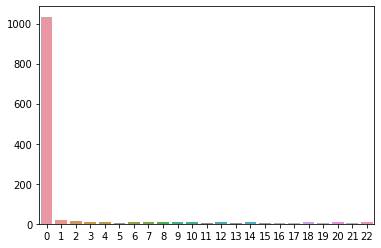

In [ ]:
sns.barplot(x=coms,y=arr_r)

In [ ]:
arr_g=pd.Series(arr_g)

In [ ]:
arr_g.to_numpy()

array([ 80,  13, 113,  10,  40,  48,  93,  27,   5,  24, 149, 126,  19,
       128,  19,  29,  20,  98,  81,  25,   2,  27,  15])

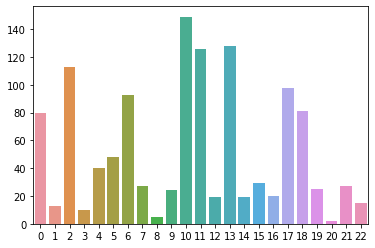

In [ ]:
sns.barplot(x=coms,y=arr_g)

<h1 align='center'>Dataset B - Eu Email core network</h1>

In [ ]:
#Create Email Follower Graph

fh = open("/content/drive/MyDrive/Datasets/Networkx/Dataset_B_EU_Emails.txt", "rb")
G2 = nx.read_edgelist(fh)
fh.close()

In [ ]:
compute_ratio(G2)

0.981094527363184

In [ ]:
df_email=pd.read_csv('/content/drive/MyDrive/Datasets/Networkx/Dataset_B_EU_Emails.csv',header=None)

In [ ]:
def ravasz(x, y,G=G2):
  if x==y:
    return 0
  
  c_n=len(list(nx.common_neighbors(G2,str(int(x[0])),str(int(y[0])))))

  if G2.has_edge(str(int(x[0])),str(int(y[0])))==True:
    c_n+=1

  u_d=G2.degree(str(int(x[0])))
  v_d=G2.degree(str(int(y[0])))

  tom= c_n/(min(u_d,v_d))#Topological overlap matrix entry

  if tom!=0:
    r=1/tom
  else:
    r=0

  return r

In [ ]:
X_Email=np.array(list(set((np.array(list(df_email[0].unique())+list(df_email[1].unique())))))).reshape(-1,1)

In [ ]:
m = pairwise_distances(X_Email, X_Email, metric=ravasz)

In [ ]:
agg = AgglomerativeClustering(n_clusters=25, affinity='precomputed',linkage='average')

In [ ]:
u = agg.fit_predict(m)

In [ ]:
arr_r

[24,
 14,
 794,
 5,
 16,
 13,
 6,
 18,
 8,
 7,
 9,
 7,
 5,
 4,
 9,
 3,
 4,
 4,
 13,
 5,
 4,
 13,
 7,
 6,
 7]

In [ ]:
comp=nx.algorithms.community.centrality.girvan_newman(G2)

In [ ]:
k = 5 #steps = 5

lister=[]

for communities in itertools.islice(comp, k):
  lister.append(tuple(sorted(c) for c in communities))

In [ ]:
count_len_girvan=[]

for i in lister:
  count_len_girvan.append(len(i))

In [ ]:
count_len_girvan

[21, 22, 23, 24, 25]

In [ ]:
arr_r=[0 for _ in range(25)]

for i in u:
  arr_r[i]+=1

In [ ]:
arr_g=[0 for _ in range(25)]

for i,x in enumerate(lister[4]):
  arr_g[i]+=len(x)

In [ ]:
coms=[i for i in range(25)]
coms=pd.Series(coms)

In [ ]:
arr_r=pd.Series(arr_r)

In [ ]:
arr_r.to_numpy()

array([ 24,  14, 794,   5,  16,  13,   6,  18,   8,   7,   9,   7,   5,
         4,   9,   3,   4,   4,  13,   5,   4,  13,   7,   6,   7])

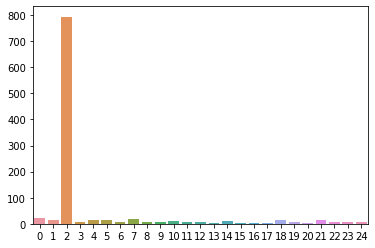

In [ ]:
sns.barplot(x=coms,y=arr_r)

In [ ]:
arr_g=pd.Series(arr_g)

In [ ]:
arr_g.to_numpy()

array([976,   6,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

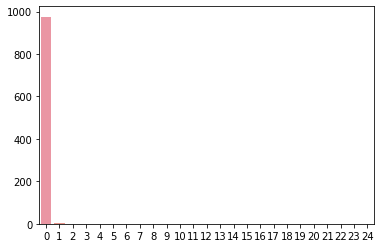

In [ ]:
sns.barplot(x=coms,y=arr_g)